# **Polynomial Linear Regression**

Although this model allows for a nonlinear relationship between Y and X, polynomial regression is still considered linear regression since it is linear in the regression coefficients, β1,β2,...,βh β 1 , β 2 , . . . , β h !



In [9]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Load Dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [11]:
# Seperate data into dependant and independant variables
dep = 'Salary'
X = dataset.loc[:,dataset.columns != dep]
y = dataset.loc[:,dep]

In [12]:
# get rid of Position column because Position and Level both are same
X = X.drop('Position',axis=1)

In [13]:
# No need to split dataset into train and test becz wee  havn't enough data to train
X.shape

(10, 1)

## **Simple Linear Regrerssion on this datasest**

In [15]:
# Simple Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## **Polynomial Linear Regression on this dataset**

In [27]:
# Making polynomial Features
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=4)
X_poly = poly_feat.fit_transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [29]:
# Polynomial Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Prediction & Vizulaization**

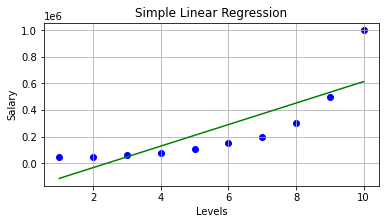

In [24]:
# Simple Linear Regression
plt.figure(figsize=(6,3))
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(X), color='green')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.grid()
plt.show()

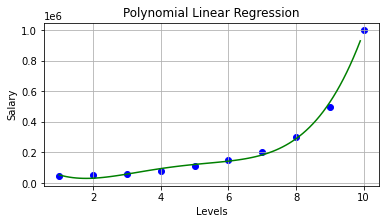

In [48]:
# Polynomial Linear Regression
X_grid = np.arange(start=X.min()[0], stop=X.max()[0], step=0.1).reshape(-1,1)
plt.figure(figsize=(6,3))
plt.scatter(X, y, color='blue')
plt.plot(X_grid, lin_reg2.predict(poly_feat.fit_transform(X_grid)), color='green')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.title('Polynomial Linear Regression')
plt.grid()
plt.show()